# Exporatory Data Analysis

Classical statistics is focused on **inference**, a set of procedures for getting conclusions about large populations based on small samples. **Data analysis** includes statistical inference as just on component.


## Estimates of Location
A basic step in exploring data is getting a 'typical value' for each feature (variable): an estimate of where most of the data is located (i.e. its central tendency). 

Metrics and Estimates Note: statisticians estimate and data scientist measure.

In [20]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

In [21]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [22]:
DFW_AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
STATE_CSV = DATA / 'state.csv'

In [23]:
df = pd.read_csv(STATE_CSV)
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Compute the mean, trimmed mean, the median of the state 
Ideas: mean is sensitive to extreme values (outliers) and median and trimmed are less sensitive to outliers and unusual distributions and hence are more robust.

In [24]:
print('population mean {}'.format(df['Population'].mean()))
print('population median {}'.format(df['Population'].median()))
print('population trimmed mean {}'.format(trim_mean(df['Population'], .1)))

population mean 6162876.3
population median 4436369.5
population trimmed mean 4783697.125


Note: mean > trimmed mean > mean

### Compute the average murder rate for the country
Note: we need to use a weighted mean to account for different populations in the states.

In [25]:
print('weighted mean {}'.format(np.average(df['Murder.Rate'], weights=df['Population'])))

weighted mean 4.445833981123393


## Estimates of Variability

Variability refers to dispersion, whether the data values are tightly clustered or spread out. At the heart of statisitcs lies variability: measuring it, reducing it, distinguishing random from real, identifying the sources of real variability, and making decisions in the presence of it.

### Estimates Based on Percentiles

Statistics based on sorted(ranked) data are referred to as **order statistics**. The most basic is range: largest value in data minus smallest value in data. Range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data. There are techniques that account for outliers. 

### Percentile:
The Pth percentile is a value such that a least P percent of the values take on this value or less and at least (100-P) percent of the values take on this value of more.

A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the **interquartile range** (IQR).

### Computing standard deviation, quantiles, and robust MAD of State Population

In [26]:
print('Population standard deviation ',df['Population'].std())
print('Population IQR ',df['Population'].quantile(.75) - df['Population'].quantile(.25))
print('Population robust MAD ',robust.scale.mad(df['Population']))

Population standard deviation  6848235.347401142
Population IQR  4847308.0
Population robust MAD  3849876.1459979336


Note std is almost twice as large as MAD. Not surprising since std is sensitive to outliers

## Exploring Data Distribution

Sometime we need to see how the data is distributed rather than the location and variability. Some key terms for exploring data distributions are: 

- **Boxplot** 
- **Frequency table**
- **Histogram**
- **Density plot**

### **Percentiles and Boxplots**
Percentiles are especially valuable for summarizing the tails of the distributions.

### Compute some percentiles of the murder rate by state.

In [27]:
df['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Note: The median is 4 murders per 100,000 people, but there's some variability: 5th percentile is 1.6 and the 95th percentile is 6.51

### Plotting boxplot of the population by state

Text(0, 0.5, 'Population (millions)')

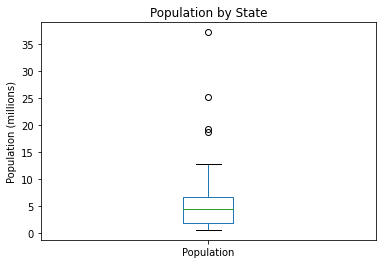

In [28]:
ax = (df['Population']/1000000).plot.box(title='Population by State')
ax.set_ylabel('Population (millions)')

From this boxplot we can immediately see that the median state population is about 5 million, half the states fall between 2 million and about 7 million, and there are some high population outliers.

### **Frequency Table and Histograms**

### Compute frequency table for population by state

In [29]:
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [30]:
binnedPopulation.name = 'binnedPopulation'
dfbinned = pd.concat([df, binnedPopulation], axis=1)
dfbinned = dfbinned.sort_values(by='Population')

groups = []
for group, subset in dfbinned.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


Note: It's important to include empty bins, which is useful information.

### Plotting a Histogram

Text(0.5, 0, 'Popluation (millions)')

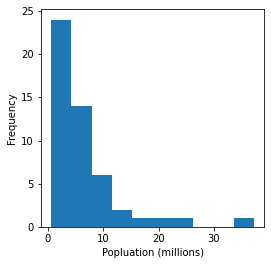

In [31]:
ax = (df['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel('Popluation (millions)')

Note: First and second moment are seen as location and variability, respectively. The third and fourth moments are called **skewness**(whether the data is skewed to larger or smaller values) and **kurtosis**(the propensity of the data to have extreme values). Boxplots help with discovering kurtosis and histograms help with discovering skewness.

**Density Plots and Estimates**: Density plots can be though of as smoothed histograms. Density plots are useful for showing the shape of a distribution and identifying its mode, skewness, and kurtosis.

### Plotting density plot superposed on a histogram

Text(0.5, 0, 'Murder Rate (per 100,000)')

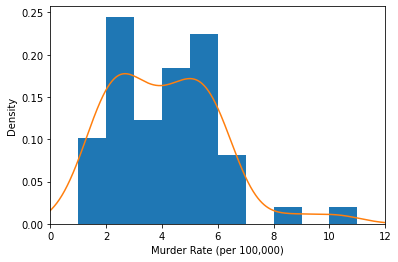

In [32]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## Exploring Binary and Categorical Data

For categorical data, simple proportions or percentages tell the story of the data

Key terms: **Mode, Expected Value, Bar chart, Pie charts**

In [33]:
dfw = pd.read_csv(DFW_AIRPORT_DELAYS_CSV)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [34]:
dfw = pd.read_csv(DFW_AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079
